In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Boston House Prices LinearRegression

In [2]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
boston = load_boston()

In [4]:
print(boston.DESCR)  # describe

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
x_data = boston.data
y_data = boston.target

In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
# 分離資料

x_train,x_test,y_train,y_test = train_test_split(x_data,
                                                 y_data,
                                                 test_size = 0.3,
                                                 random_state = 1)

In [12]:
# 開線性迴歸

regr = LinearRegression()

In [13]:
# Train

regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
regr.intercept_  # 線性迴歸常數項

46.42009543533034

In [17]:
regr.coef_ # 各項係數

array([-9.71284334e-02,  6.07284394e-02,  5.96370092e-02,  2.44352809e+00,
       -2.14995617e+01,  2.78993012e+00,  3.66229013e-03, -1.51568850e+00,
        3.06819943e-01, -1.12697744e-02, -1.00652372e+00,  6.56942407e-03,
       -5.69755469e-01])

# statsmodels

In [18]:
import statsmodels.api as sm

In [20]:
model = sm.OLS(y_train, x_train) 
# ordinary least square regression
# note that y_train is the former argument
# 開機器

In [21]:
result = model.fit()

In [22]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     533.4
Date:                Fri, 02 Aug 2019   Prob (F-statistic):          1.37e-217
Time:                        21:41:57   Log-Likelihood:                -1087.0
No. Observations:                 354   AIC:                             2200.
Df Residuals:                     341   BIC:                             2250.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0562      0.046     -1.220      0.2

# Machine Learning
###  
### 1. Supervised learning (監督式學習)
###  將已知的答案送入電腦，讓電腦學習想要的函數。此處介紹SVM
###   
### 2. Unsupervised learning (非監督式學習)
###  讓電腦自我學習，產生電腦認為的結果。這邊介紹K-Means

## SVM

In [23]:
from sklearn.svm import SVC # SVC is the machine

In [25]:
x = np.array([[-3,1], [5,6], [7,-5], [-4,-3]])
y = np.array([1, 1, 2, 2]) #將資料分類，前兩種第一類，後兩種第二類

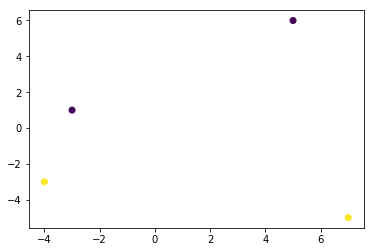

In [27]:
plt.scatter(x[:,0] , x[:,1], c = y)
# x[: ,0] 表示取該矩陣所有行的第一個資料 

In [29]:
clf = SVC()

In [51]:
clf.fit(x,y) # 訓練

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
clf.predict([[2,3]]) # 預測在第二類

array([1])

In [36]:
xx = [1,2,3,4]
yy = [5,6,7,8]

In [37]:
X, Y = np.meshgrid(xx, yy)

In [38]:
X

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [42]:
Y # yy 組成 column

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8]])

In [40]:
X1 = X.ravel()
X1

array([1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4])

In [43]:
Y1 = Y.ravel()
Y1

array([5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8])

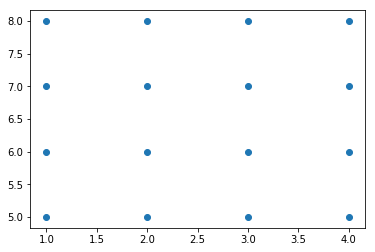

In [46]:
plt.scatter(X1, Y1)

In [47]:
X, Y = np.meshgrid(np.linspace(-6,5,30), np.linspace(-8,7,30))

In [48]:
X1 = X.ravel()
Y1 = Y.ravel()

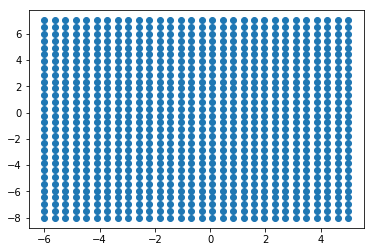

In [49]:
plt.scatter(X1, Y1)

In [50]:
z = clf.predict(np.c_[X1, Y1]) 
# >>> np.c_[np.array([1,2,3]), np.array([4,5,6])]
# array([[1, 4],
#       [2, 5],
#       [3, 6]])    類似zip的功能

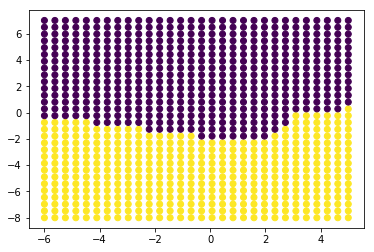

In [53]:
plt.scatter(X1, Y1, c = z) # 預測結果拿來做分類

In [54]:
from sklearn.datasets import load_iris

In [55]:
iris = load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [58]:
X = iris.data
X[0]

#       - sepal length in cm
#       - sepal width in cm
#       - petal length in cm
#       - petal width in cm
        

array([5.1, 3.5, 1.4, 0.2])

In [60]:
Y = iris.target
Y[0]

0

In [62]:
Y # 鳶尾花的種類，分三種，共0,1,2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [63]:
x_data = X[:, 1:3] #取 index = 1&2 的值
x_data[0]

array([3.5, 1.4])

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    Y,
                                                    test_size = 0.2,
                                                    random_state = 87)

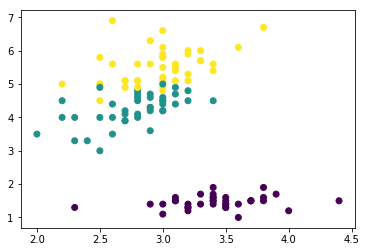

In [70]:
plt.scatter(x_train[:,0] , x_train[:,1] , c = y_train) 
# c = y_train means 分辨種類

In [71]:
clf = SVC()

In [72]:
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [73]:
y_predict = clf.predict(x_test)

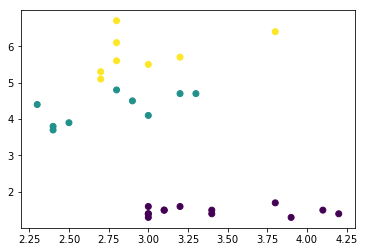

In [74]:
plt.scatter(x_test[:, 0], x_test[:, 1], c = y_predict)

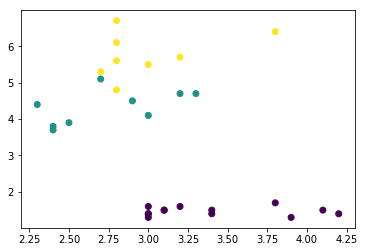

In [75]:
plt.scatter(x_test[:, 0], x_test[:, 1], c = y_test)

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
accuracy_score(y_test, y_predict)

0.9333333333333333

In [78]:
from sklearn.metrics import confusion_matrix

In [81]:
confusion_matrix(y_test,y_predict)
# x 軸為 y_test 值
# y 軸為 y_predict 值(預測結果)
# 對角線為預測值跟測試值一樣的數量

#    0  1  2  -->花的種類
#  0
#  1
#  2

array([[13,  0,  0],
       [ 0,  8,  1],
       [ 0,  1,  7]], dtype=int64)

In [82]:
X,Y = np.meshgrid(np.arange(1,5,0.2), np.arange(0,8,0.2))

In [84]:
X1 = X.ravel()
Y1 = Y.ravel()  # 拉平，好做zip

In [85]:
z = clf.predict(np.c_[X1,Y1])

In [86]:
z

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,

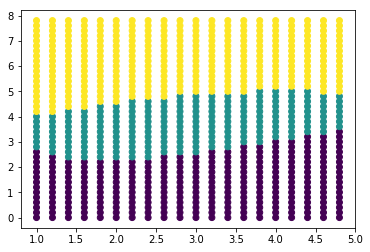

In [87]:
plt.scatter(X1,Y1,c = z)

In [90]:
z1 = z.reshape(X.shape)

In [91]:
z[0]

0

In [92]:
z1[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [93]:
z.shape

(800,)

In [94]:
z1.shape

(40, 20)

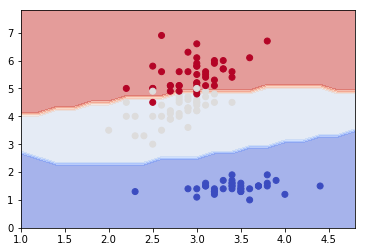

In [98]:
plt.contourf(X,Y,z1, cmap = 'coolwarm', alpha = 0.5) # alpha 指透明度
plt.scatter(x_train[: ,0], x_train[:, 1], c = y_train, cmap = 'coolwarm')

# K-Mean

In [99]:
from sklearn.cluster import KMeans

In [101]:
clf3 = KMeans(n_clusters=3) # 送入的資料有三種

In [102]:
clf3.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [103]:
clf3.labels_

array([1, 2, 1, 0, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 1, 2, 2,
       0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 2, 1, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0,
       1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0, 1, 1, 2,
       1, 2, 2, 2, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2,
       2, 1, 1, 0, 2, 0, 2, 2, 0, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 1,
       0, 2, 2, 1, 2, 2, 0, 1, 0, 0])

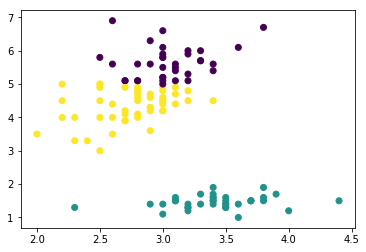

In [105]:
plt.scatter(x_train[:,0], x_train[:,1], c = clf3.labels_)

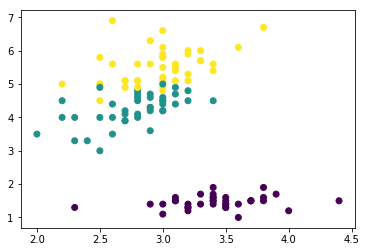

In [106]:
plt.scatter(x_train[: ,0], x_train[:, 1], c = y_train)

In [108]:
y_predict = clf3.predict(x_test)

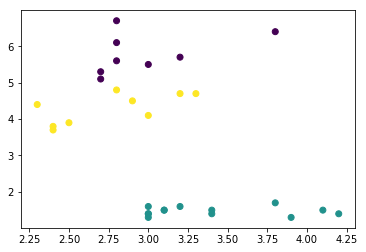

In [109]:
plt.scatter(x_test[:,0], x_test[:,1],c = y_predict)